#Capstone Project - Pneumonia Detection Challenge

**Project Description:** In this capstone project, the goal is to build a pneumonia detection system, to locate the position of 
inflammation in an image. 
Tissues with sparse material, such as lungs which are full of air, do not absorb the X-rays and appear 
black in the image. Dense tissues such as bones absorb X-rays and appear white in the image.
While we are theoretically detecting “lung opacities”, there are lung opacities that are not pneumonia 
related.
In the data, some of these are labeled “Not Normal No Lung Opacity”. This extra third class indicates 
that while pneumonia was determined not to be present, there was nonetheless some type of 
abnormality on the image and oftentimes this finding may mimic the appearance of true pneumonia.

**Dicom original images:** Medical images are stored in a special format called DICOM files (*.dcm). They 
contain a combination of header metadata as well as underlying raw image arrays for pixel data.

**Dataset:** Details about the data and dataset files are given in below link,
https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data


## Overview

**What is Pneumonia?**

Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes 
inflammation in the air sacs in your lungs, which are called alveoli.

Pneumonia accounts for over 15% of all deaths of children under 5 years old internationally. In 2017, 
920,000 children under the age of 5 died from the disease. It requires review of a chest radiograph (CXR) 
by highly trained specialists and confirmation through clinical history, vital signs and laboratory exams. 
Pneumonia usually manifests as an area or areas of increased opacity on CXR. However, the diagnosis of 
pneumonia on CXR is complicated because of a number of other conditions in the lungs such as fluid 
overload (pulmonary edema), bleeding, volume loss (atelectasis or collapse), lung cancer, or postradiation or surgical changes. Outside of the lungs, fluid in the pleural space (pleural effusion) also 
appears as increased opacity on CXR. When available, comparison of CXRs of the patient taken at 
different time points and correlation with clinical symptoms and history are helpful in making the 
diagnosis.

CXRs are the most commonly performed diagnostic imaging study. A number of factors such as 
positioning of the patient and depth of inspiration can alter the appearance of the CXR, complicating 
interpretation further. In addition, clinicians are faced with reading high volumes of images every shift.

**Pneumonia Detection**

Now to detection Pneumonia we need to detect Inflammation of the lungs. In this project, you’re 
challenged to build an algorithm to detect a visual signal for pneumonia in medical images. Specifically, 
your algorithm needs to automatically locate lung opacities on chest radiographs.

**Business Domain Value**

Automating Pneumonia screening in chest radiographs, providing affected area details through 
bounding box. 
Assist physicians to make better clinical decisions or even replace human judgement in certain 
functional areas of healthcare (eg, radiology).
Guided by relevant clinical questions, powerful AI techniques can unlock clinically relevant information 
hidden in the massive amount of data, which in turn can assist clinical decision making.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install packages
!pip install  pydicom

     |████████████████████████████████| 2.0 MB 4.0 MB/s 


In [ ]:
# Import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pydicom as dcm
import tensorflow as tf
from tqdm import tqdm
import multiprocessing as mp

In [ ]:
print('\nWorking Directory: ', os.getcwd())

os.chdir('/content/drive/MyDrive/Colab Notebooks/capstone_data')
print('Working directory has been changed')

print('\nCurrent Working Directory: ', os.getcwd())


Working Directory:  /content
Working directory has been changed

Current Working Directory:  /content/drive/.shortcut-targets-by-id/1zbq_qU4Ty9Zpzj9xK68Ojw6PqMjkJ_BU/capstone_data


### **Pre-Processing, Data Visualization, EDA**
* Exploring the given Data files, classes and images of different classes.
* Dealing with missing values
* Visualization of different classes 
* Analysis from the visualization of different classes.

#### **Reading CSV files**

**File description from kaggle**
1.   stage_2_train_labels.csv - the training set. Contains patientIds and bounding box / target information.
2.   stage_2_detailed_class_info.csv - provides detailed information about the type of positive or negative class for each image.


**Data fields**

* patientId - A patientId. Each patientId corresponds to a unique image.
* x - the upper-left x coordinate of the bounding box.
* y - the upper-left y coordinate of the bounding box.
* width - the width of the bounding box.
* height - the height of the bounding box.
* Target - the binary Target, indicating whether this sample has evidence of pneumonia.



In [ ]:
# reading the csv files
df_train = pd.read_csv("stage_2_train_labels.csv")
df_train_class = pd.read_csv("stage_2_detailed_class_info.csv")

print('First five rows of the train dataset:\n\n', df_train.head())
print('---'*30)
print('First five rows of the train class dataset:\n\n', df_train_class.head())

First five rows of the train dataset:

                               patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1
------------------------------------------------------------------------------------------
First five rows of the train class dataset:

                               patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515

In [ ]:
df_train.patientId.duplicated().sum()

3543

In [ ]:
# analyse for number of row,columns, uniques, duplicates in the csv files
print('Train dataframe has {} rows and {} columns'.format(df_train.shape[0],df_train.shape[1]))
print('Train Class dataframe has {} rows and {} columns'.format(df_train_class.shape[0],df_train_class.shape[1]))
print('---'*30)
print('Number of unique patients in train dataframe: {}'.format(df_train.patientId.nunique()))
print('Number of unique patients in train class dataframe: {}'.format(df_train_class.patientId.nunique()))
print('---'*30)
print('Number of duplicates in patientID in train dataframe: {}'.format(df_train.patientId.duplicated().sum()))
print('Number of duplicates in patientID in train class dataframe: {}'.format(df_train_class.patientId.duplicated().sum()))

Train dataframe has 30227 rows and 6 columns
Train Class dataframe has 30227 rows and 2 columns
------------------------------------------------------------------------------------------
Number of unique patients in train dataframe: 26684
Number of unique patients in train class dataframe: 26684
------------------------------------------------------------------------------------------
Number of duplicates in patientID in train dataframe: 3543
Number of duplicates in patientID in train class dataframe: 3543


**observation :** The dataset contains information about 26684 patients. Out of these 26684 patients, some of them have multiple entries in the dataset.

In [ ]:
#check if both the files has same patient ids
x = sum(df_train.patientId==df_train_class.patientId)
print('Number of same patients in both csv files is - ', x)
print('---'*30)
if(x == df_train.shape[0]):
  print('**No Mismatch Found in the patientIDs**')
else:
  print('** Mismatch Found in the patientIDs**')

Number of same patients in both csv files is -  30227
------------------------------------------------------------------------------------------
**No Mismatch Found in the patientIDs**


In [ ]:
#nulls in target
print('total number of nulls in Target column - {}'.format(df_train.Target.isnull().sum()))

total number of nulls in Target column - 0


In [ ]:
#check the nulls in the x,y,width and heigth (bounding boxes) in different target
print('nulls in bounding boxes/null counts in the columns by target -- \n')
df_train.groupby('Target').agg({'x': lambda x: x.isnull().sum(),'y': lambda x: x.isnull().sum(),
                                'width': lambda x: x.isnull().sum(),'height': lambda x: x.isnull().sum()})

nulls in bounding boxes/null counts in the columns by target -- 



,x,y,width,height
Target,,,,
0,20672,20672,20672,20672
1,0,0,0,0


**observation :** There is no nulls in the bounding boxes - x,y,width and height for target =1, where pneumonia is found

In [ ]:
#since there is duplicates in the patientIDs, check if only one class is assocaited with each patient or more?
print('Maximum number of class one patient is assocated with is - {}'.format(df_train_class.groupby(['patientId'])['class'].nunique().max()))

Maximum number of class one patient is assocated with is - 1


In [ ]:
# lets check the number of bounding boxes patient and merge it with df_train
bounding_box = df_train.groupby('patientId').agg({'x': lambda x: x.count()}).reset_index().rename(columns = {'x':'number_of_boxes'})
display(bounding_box.number_of_boxes.value_counts().to_frame().rename(columns ={'number_of_boxes':'number_of_patientIDs'}))
print('--'*30)
df_train = df_train.merge(bounding_box, on = 'patientId', how = 'left')
df_train.head()

,number_of_patientIDs
0,20672
2,3266
1,2614
3,119
4,13


------------------------------------------------------------


,patientId,x,y,width,height,Target,number_of_boxes
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,2


**Observation:**
* 20672 unique patients no bounding box information, while
* 2614 unique patients have 1 bounding box information.
* 3266 unique patients have 2 bounding box information.
* 119 unique patients have 3 bounding box information.
* 13 unique patients have 4 bounding box information.

In [ ]:
#concat the two dataframe
df_train = pd.concat([df_train, df_train_class['class']], axis = 1)
print('Shape of the dataset after the merge: {}'.format(df_train.shape))
df_train.head()

Shape of the dataset after the merge: (30227, 8)


,patientId,x,y,width,height,Target,number_of_boxes,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,2,Lung Opacity


#### **Reading Image files**

* Image is stored as DCM file.

* The DCM file extension is used for DICOM which stands for Digital Imaging and Communications in Medicine. 
* This is the common file format used to store medical imaging data when a patient undergoes a CT, MRI, PET, UltraSound, and many other types of medical scans.
*  We will be using pydicom package  to read  images

In [ ]:
df_train.patientId[0]

'0004cfab-14fd-4e49-80ba-63a80b6bddd6'

In [ ]:
# read the image file for a patient and see the available information in the file.
image_data = dcm.read_file('stage_2_train_images/{}.dcm'.format(df_train.patientId[0]))
print(image_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

**Observations**

From the above sample we can see that dicom file contains some of the information that can be used for further analysis such as sex, age, body part examined (which should be mostly chest), view position and modality. Size of this image is 1024 x 1024 (rows x columns).

In [ ]:
# check the number of images in the train image folder and if image exists for each patientId
print('Number of images in training image folder - {}.'.format(len(os.listdir('stage_2_train_images/'))))

Number of images in training image folder - 26684.


**Obervation:**  Total training images (26684) is same as the total unique patientId (26684)(ref 8 col). Hence , we can say there there is atleast one image present for every patientId.

**Feature extraction from the dicom image data**

We can see a lot of information can be extracted from DCM image data like Age, sex, View, Modality etc.

These can be used to understand the distribution of age,sex,viewPosition etc.. with evidence of lung opacity and with no definite evidence of lung opacity.

In [ ]:
# get the features from DCM image metadata
cols =  ['Modality', 'ConversionType', 'PatientSex', 'PatientAge', 'BodyPartExamined', 'ViewPosition', 'Rows', 'Columns']

def get_dcm_image_features(df, path):
  for i in cols:
    df[i] = None

  for i in tqdm(range(df.shape[0]),desc='Merging features from Image'):
    img = dcm.read_file(path+'{}.dcm'.format(df.patientId[i]))
    df.loc[i,'Modality'] = img.Modality
    df.loc[i,'ConversionType'] = img.ConversionType
    df.loc[i,'PatientSex'] = img.PatientSex
    df.loc[i,'PatientAge'] = img.PatientAge
    df.loc[i,'BodyPartExamined'] = img.BodyPartExamined
    df.loc[i,'ViewPosition'] = img.ViewPosition
    df.loc[i,'Rows'] = img.Rows
    df.loc[i,'Columns'] = img.Columns

get_dcm_image_features(df_train,'stage_2_train_images/')

Merging features from Image: 100%|██████████| 30227/30227 [13:31<00:00, 37.25it/s]


In [ ]:
# save the data to a pickle file
# df_train.to_pickle('df_train.pkl')
# df_train.to_pickle('df_train_bkp.pkl')

In [ ]:
#read the saved dataframe from pkl file
df_train = pd.read_pickle('df_train.pkl')
df_train.head()

,patientId,x,y,width,height,Target,number_of_boxes,class,Modality,ConversionType,PatientSex,PatientAge,BodyPartExamined,ViewPosition,Rows,Columns
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,0,No Lung Opacity / Not Normal,CR,WSD,F,51,CHEST,PA,1024,1024
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,0,No Lung Opacity / Not Normal,CR,WSD,F,48,CHEST,PA,1024,1024
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,0,No Lung Opacity / Not Normal,CR,WSD,M,19,CHEST,AP,1024,1024
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,0,Normal,CR,WSD,M,28,CHEST,PA,1024,1024
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,2,Lung Opacity,CR,WSD,F,32,CHEST,AP,1024,1024


In [ ]:
df_train.shape

(30227, 16)

No of total entries: 30227


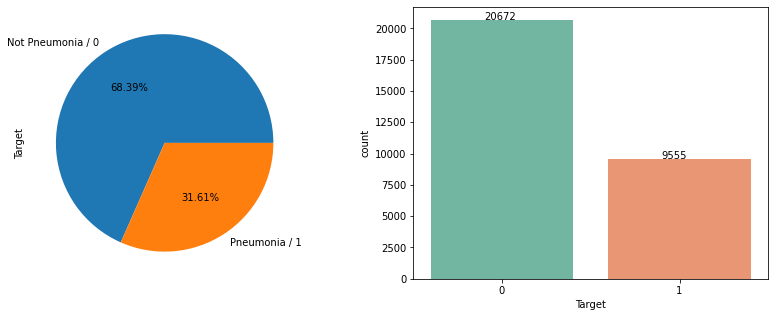

In [ ]:
print(f'No of total entries: {df_train.shape[0]}')

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(14, 5))
df_train['Target'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', labels = ['Not Pneumonia / 0', 'Pneumonia / 1'], ax=ax[0]);
sns.countplot(x = 'Target',data = df_train,ax=ax[1],palette='Set2');
for p in ax[1].patches:
   ax[1].annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.2))

**Observations:** From the above pie chart and count plot it is clear that out of (total) 30227 entries in the dataset
*  there are 20672 (i.e., 68.39%) entries in the dataset  of the patient not having Pnuemonia
* whereas 9555 (i.e., 31.61%) entries corresponds to Positive case of Pneumonia.

No of total entries: 30227 



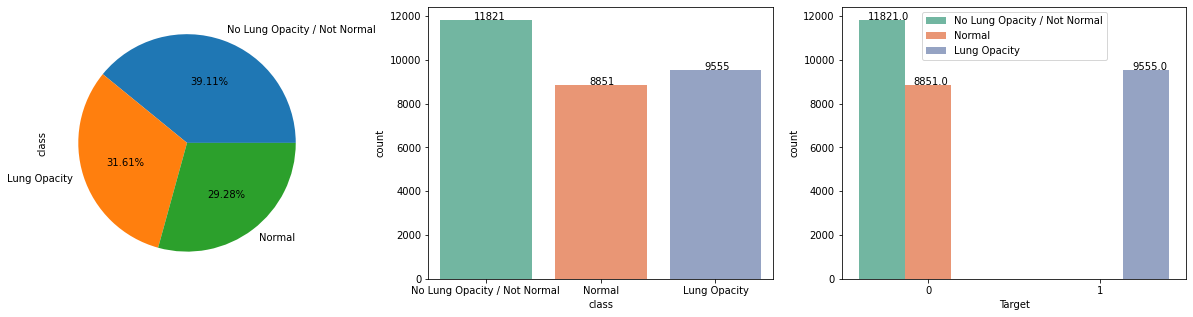

In [ ]:
print(f'No of total entries: {df_train.shape[0]} \n')

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(21, 5))
df_train['class'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', ax=ax[0]);
sns.countplot(x = 'class',data = df_train,ax=ax[1],palette='Set2');
for p in ax[1].patches:
   ax[1].annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.2))
sns.countplot(x = 'Target',hue='class', data = df_train,ax=ax[2],palette='Set2');
plt.legend(loc='upper center');
for p in ax[2].patches:
   ax[2].annotate(p.get_height(), (p.get_x()+0.05, p.get_height()+0.2))

**Observation:** From the above pie chart and count plots it is clear that out of (total) 30227 entries in the dataset
*  there are 20672 (i.e., 68.39%) entries in the dataset are not having Pnuemonia out of which:

  1.   11821 (i.e., 39.11%) entries have No Lung Opacity but Not Normal Lung found.
  2.   8851 (i.e., 29.28%) entries have Normal Lung found.


* whereas 9555 (i.e., 31.61%) entries corresponds to Positive case of Pneumonia, all of them have lung opacity found.

In [ ]:
df_train.columns

Index(['patientId', 'x', 'y', 'width', 'height', 'Target', 'number_of_boxes',
       'class', 'Modality', 'ConversionType', 'PatientSex', 'PatientAge',
       'BodyPartExamined', 'ViewPosition', 'Rows', 'Columns'],
      dtype='object')

**Analyze different features obtaines from DCM image**

In [ ]:
for col in df_train.columns[8:]:
  print('\033[1m' + col +'\033[0m')
  print(df_train[col].value_counts())
  print('\n')

Modality
CR    30227
Name: Modality, dtype: int64


ConversionType
WSD    30227
Name: ConversionType, dtype: int64


PatientSex
M    17216
F    13011
Name: PatientSex, dtype: int64


PatientAge
58     955
56     869
52     791
55     767
54     717
      ... 
148      1
151      1
153      1
150      1
155      1
Name: PatientAge, Length: 97, dtype: int64


BodyPartExamined
CHEST    30227
Name: BodyPartExamined, dtype: int64


ViewPosition
AP    15297
PA    14930
Name: ViewPosition, dtype: int64


Rows
1024    30227
Name: Rows, dtype: int64


Columns
1024    30227
Name: Columns, dtype: int64




**Observation:** From the above countplot we can observer that Modality, ConversionType, BodyPartExamined, Rows, Columns have single values in them. So there is no information there. These features can be dropped from dataset.

Lets analyze rest of the features i.e,

*   PatientSex
*   PatientAge
*   ViewPosition



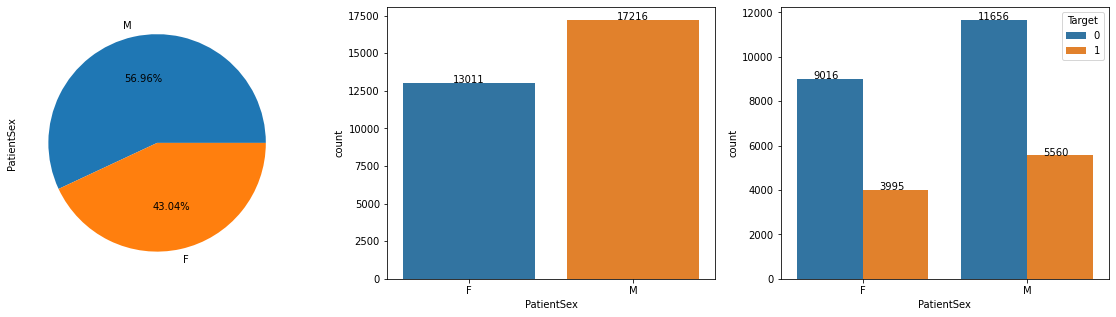

In [ ]:
#PatientSex
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(20, 5))
df_train['PatientSex'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', ax=ax[0]);
sns.countplot(x = 'PatientSex',data = df_train,ax=ax[1]);
for p in ax[1].patches:
   ax[1].annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.2))
sns.countplot(x = 'PatientSex',hue = 'Target', data = df_train,ax=ax[2]);
for p in ax[2].patches:
   ax[2].annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))

**Observation:** From the above pie chart and count plots it is clear that out of (total) 30227 entries in the dataset
*  there are 13011 (i.e., 43.04%) entries in the dataset are of **Females**. Out of which:

  1.   3995 entries have Pneumonia.
  2.   9016 entries does not have Pneumonia.

* whereas 17216 (i.e., 56.96%) entries corresponds to **Males**. Out of which:
  1.   5660 entries have Pneumonia.
  2.   11656 entries does not have Pneumonia.

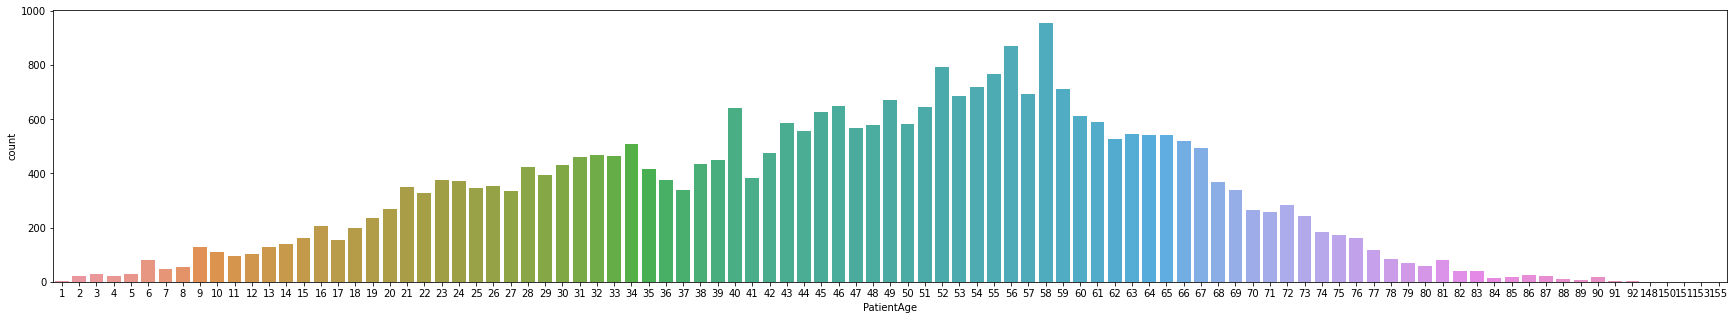

In [ ]:
##PatientAge
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(30, 5))
sns.countplot(x = df_train['PatientAge'].astype(int),order = df_train['PatientAge'].astype(int).value_counts().sort_index().index);

**Observation:** Patient having age group between 40-60 have maximun probability of having pseunomia .

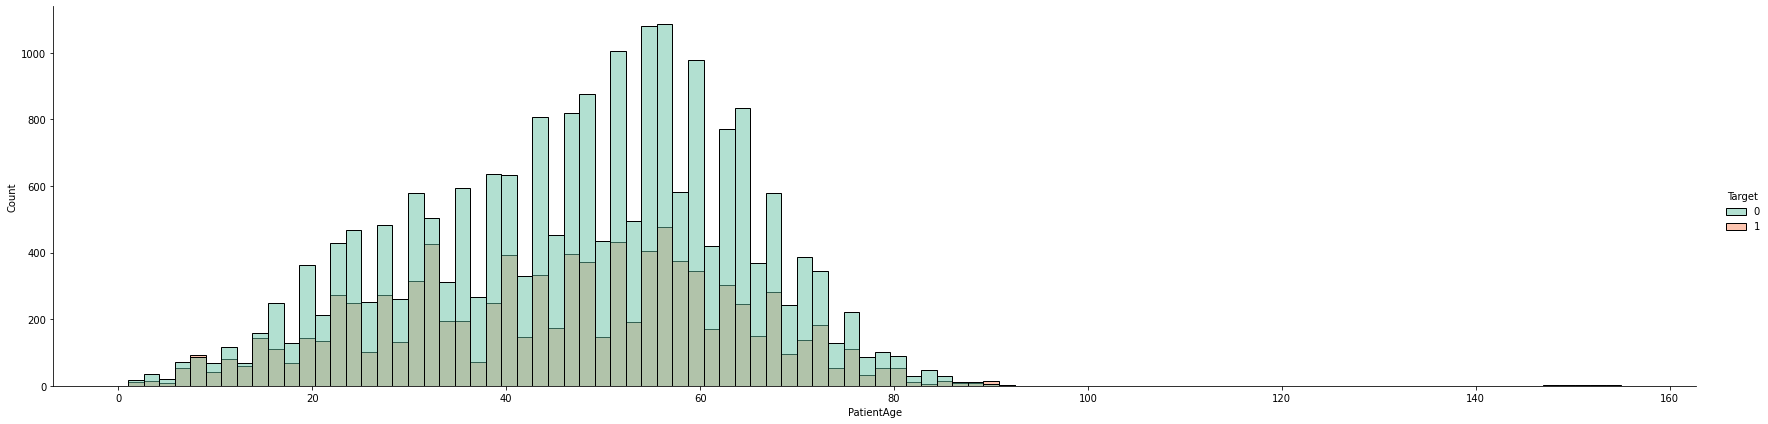

In [ ]:
sns.displot(x = df_train['PatientAge'].astype(int),hue=df_train['Target'],height = 6, aspect = 4,palette='Set2');

**Observation :** grey values shows the portion having psenumonia .

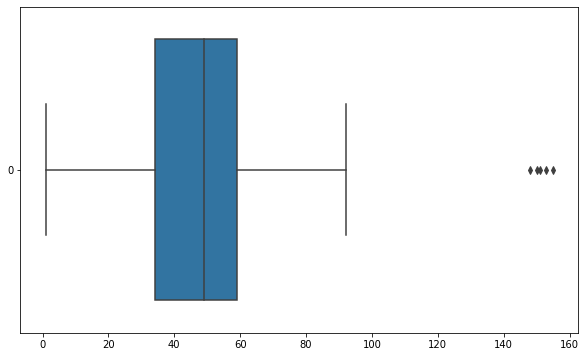

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df_train['PatientAge'], orient = 'h');

In [ ]:
#lets check if the people are more likey to get pneumonia in a certail age group. We will remove outliers first based on box plot. 
df_temp = df_train.copy()
df_temp.PatientAge = df_temp.PatientAge.astype('int')
df_temp = df_temp[df_temp.PatientAge<140] # remove outliers 
df_temp['PatientAgeGroups'] = pd.qcut(df_temp.PatientAge,q=10) # 10 age groups based on quantile
df_temp = pd.DataFrame(pd.crosstab(df_temp.PatientAgeGroups, df_temp.Target)).reset_index().rename(columns = {0:"Negative",1:"Positive"})
df_temp.columns.name = None
df_temp['Ratio_Positive/Negative'] = df_temp.Positive.copy()/df_temp.Negative.copy()
df_temp.set_index('PatientAgeGroups',inplace=True)
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Negative,Positive,Ratio_Positive/Negative
PatientAgeGroups,,,
"(0.999, 23.0]",2025,1228,0.606420
"(23.0, 31.0]",2045,1070,0.523227
"(31.0, 38.0]",1969,1028,0.522092
"(38.0, 44.0]",2112,981,0.464489
"(44.0, 49.0]",2148,942,0.438547
"(49.0, 53.0]",1933,769,0.397827
"(53.0, 57.0]",2164,883,0.408041
"(57.0, 62.0]",2359,1036,0.439169
"(62.0, 67.0]",1911,729,0.381476


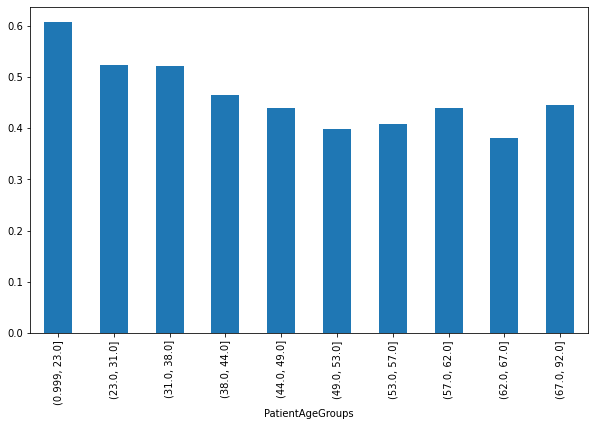

In [ ]:
df_temp['Ratio_Positive/Negative'].plot(kind = 'bar',figsize = (10,6));

**Observation:** From the above count plot we can observe that occurance of pneumonia is spread across all age groups.
From the Ratio_Positive/Negative column and its bar plot, though the ratio is not very significant, we can observer that smaller age groups have slightly higher chance of getting Pneumonia. i.e 
for Age group (0.999, 23.0] ratio of Positive to negative cases = 0.606

Also, there are some outliers in the patient age columns. We can replace it with max values observed in the dataset after removing the outliers.

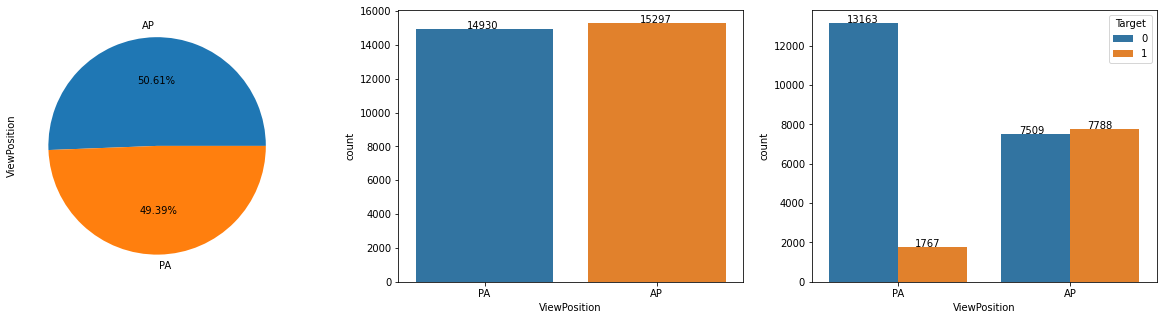

In [ ]:
#ViewPosition
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(21, 5))
df_train['ViewPosition'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', ax=ax[0]);
sns.countplot(x = 'ViewPosition',data = df_train,ax=ax[1]);
for p in ax[1].patches:
   ax[1].annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.2))
sns.countplot(x = 'ViewPosition',hue = 'Target', data = df_train,ax=ax[2]);
for p in ax[2].patches:
   ax[2].annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))

As seen above, two View Positions that are in the training dataset are AP (Anterior/Posterior) and PA (Posterior/Anterior). These type of X-rays are mostly used to obtain the front-view. Apart from front-view, a lateral image is usually taken to complement the front-view.


*   **Posterior/Anterior (PA)**: Here the chest radiograph is acquired by passing the X-Ray beam from the patient's posterior (back) part of the chest to the anterior (front) part. While obtaining the image patient is asked to stand with their chest against the film. In this image, the hear is on the right side of the image as one looks at it. These are of higher quality and assess the heart size more accurately
*   **Anterior/Posterior (AP)**: At times it is not possible for radiographers to acquire a PA chest X-ray. This is usually because the patient is too unwell to stand. In these images the size of Heart is exaggerated.


**Observation:** From the above pie chart and count plots it is clear that out of (total) 30227 entries in the dataset
*  there are 14930 (i.e., 40.39%) entries in the dataset are of Females. Out of which:

  1.   1767 entries have Pneumonia.
  2.   13163 entries does not have Pneumonia.

* whereas 15297 (i.e., 50.61%) entries corresponds to Males. Out of which:
  1.   7509 entries have Pneumonia.
  2.   7788 entries does not have Pneumonia.





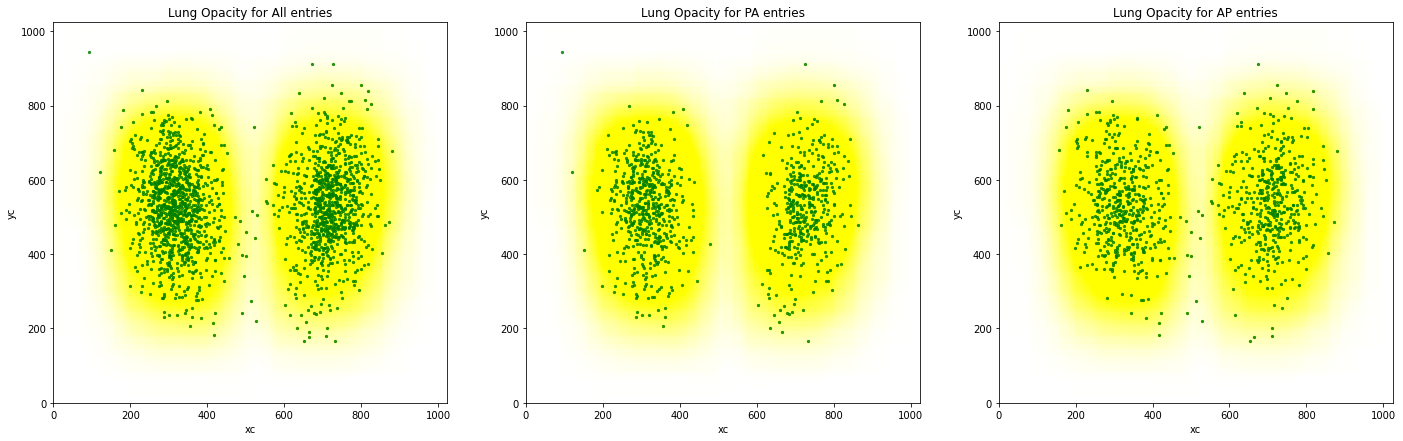

In [ ]:
#bounding box position in lungs using scatter plot for Pneumonia entires in the dataset.
df_pneumonia = df_train[df_train['Target'] == 1].copy()
df_pneumonia['xc'] = df_pneumonia['x'] + df_pneumonia['width'] / 2
df_pneumonia['yc'] = df_pneumonia['y'] + df_pneumonia['height'] / 2
df_pneumonia_PA = df_pneumonia[df_pneumonia['ViewPosition'] == 'PA']
df_pneumonia_AP = df_pneumonia[df_pneumonia['ViewPosition'] == 'AP']
df_pneumonia_sample = pd.concat([df_pneumonia_PA.sample(1000,random_state = 123),df_pneumonia_AP.sample(1000,random_state = 123)],axis = 0)

from matplotlib.patches import Rectangle
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(24, 7))

df_pneumonia_sample.plot.scatter(x = 'xc', y = 'yc', ax = ax[0], alpha = 0.8, marker = '.', 
                   xlim = (0, 1024), ylim = (0, 1024), color = 'green')
ax[0].set_title('Lung Opacity for All entries')
for i, row in df_pneumonia_sample.iterrows():
    ax[0].add_patch(Rectangle(xy=(row['x'], row['y']),
                width=row['width'],height=row['height'],alpha=0.002, color="yellow"))

df_pneumonia_sample_PA = df_pneumonia_sample[df_pneumonia_sample['ViewPosition'] == 'PA'].copy()
df_pneumonia_sample_PA.plot.scatter(x = 'xc', y = 'yc', ax = ax[1], alpha = 0.8, marker = '.', 
                   xlim = (0, 1024), ylim = (0, 1024), color = 'green')
ax[1].set_title('Lung Opacity for PA entries')
for i, row in df_pneumonia_sample.iterrows():
    ax[1].add_patch(Rectangle(xy=(row['x'], row['y']),
                width=row['width'],height=row['height'],alpha=0.002, color="yellow"))

df_pneumonia_sample_AP = df_pneumonia_sample[df_pneumonia_sample['ViewPosition'] == 'AP'].copy()
df_pneumonia_sample_AP.plot.scatter(x = 'xc', y = 'yc', ax = ax[2], alpha = 0.8, marker = '.', 
                   xlim = (0, 1024), ylim = (0, 1024), color = 'green')
ax[2].set_title('Lung Opacity for AP entries')
for i, row in df_pneumonia_sample.iterrows():
    ax[2].add_patch(Rectangle(xy=(row['x'], row['y']),
                width=row['width'],height=row['height'],alpha=0.002, color="yellow"))

**Observation:** From the above scatter plots we can observer that lung opacity is found all across the lungs for both PA and AP viewPositions.

**Plotting DCM Chest Images**

In [ ]:
import math
def plot_image(id_series,df,path,display_opacity=True):
  id_series = id_series.unique()
  row_len = math.ceil(len(id_series)/3) if len(id_series)/3 > 1 else 1
  fig, ax = plt.subplots(nrows=row_len, ncols=3,figsize=(18, row_len*5))
  for i in range(len(id_series)):
    data = df[df.patientId == id_series[i]].copy().reset_index(drop=True)
    img = dcm.read_file(path+'{}.dcm'.format(id_series[i]))
    sex = img.PatientSex
    age = img.PatientAge
    positon = img.ViewPosition
    image_data = dcm.dcmread(path+'{}.dcm'.format(id_series[i]))
    if(row_len>1):
      ax[i//3,i%3].imshow(image_data.pixel_array,cmap = plt.cm.bone)
      ax[i//3,i%3].axis('off')
      ax[i//3,i%3].set_title('p_id: {}\nSex: {}, Age: {}, VP: {}\nTarget: {}, Class: {}'.format(data['patientId'][0],\
                                                                                           sex,age,positon,data['Target'][0],data['class'][0]))
      if(display_opacity):
        for j in range(data.shape[0]):
          ax[i//3, i%3].add_patch(Rectangle(xy = (data['x'][j], data['y'][j]),
                        width = data['width'][j], height = data['height'][j], 
                        color = 'blue', alpha = 0.10))
    else:
      ax[i].imshow(image_data.pixel_array,cmap = plt.cm.bone)
      ax[i].axis('off')
      ax[i].set_title('p_id: {}\nSex: {}, Age: {}, VP: {}\nTarget: {}, Class: {}'.format(data['patientId'][0],\
                                                                                              sex,age,positon,data['Target'][0],data['class'][0]))
      if(display_opacity):
        for j in range(data.shape[0]):
          ax[i].add_patch(Rectangle(xy = (data['x'][j], data['y'][j]),
                        width = data['width'][j], height = data['height'][j], 
                        color = 'blue', alpha = 0.10))
      
      

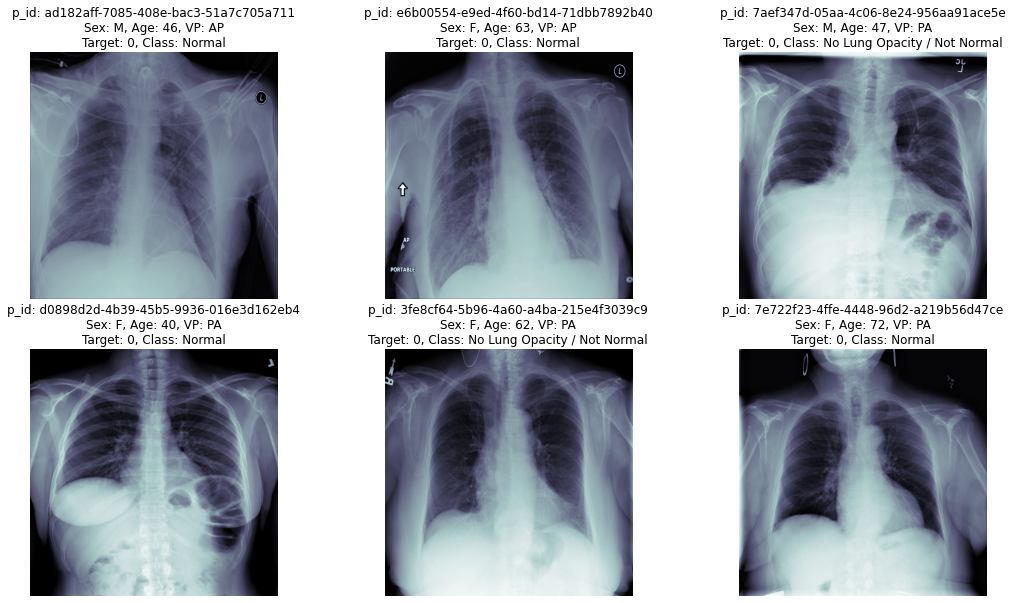

In [ ]:
#plotting sample images where no Pneumonia was found
plot_image(df_train['patientId'][df_train.Target==0].sample(6,random_state = 123),df_train.copy(),
           'stage_2_train_images/',display_opacity=True)

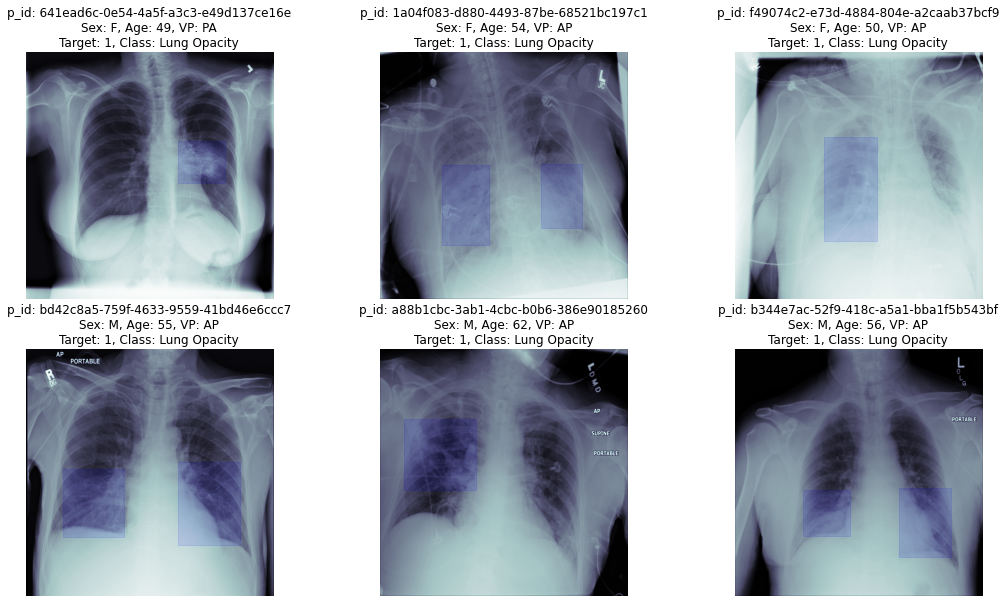

In [ ]:
#ploting sample images where pneumonia was found
plot_image(df_train['patientId'][df_train.Target==1].sample(6,random_state = 123),df_train.copy(),
           'stage_2_train_images/',display_opacity=True)

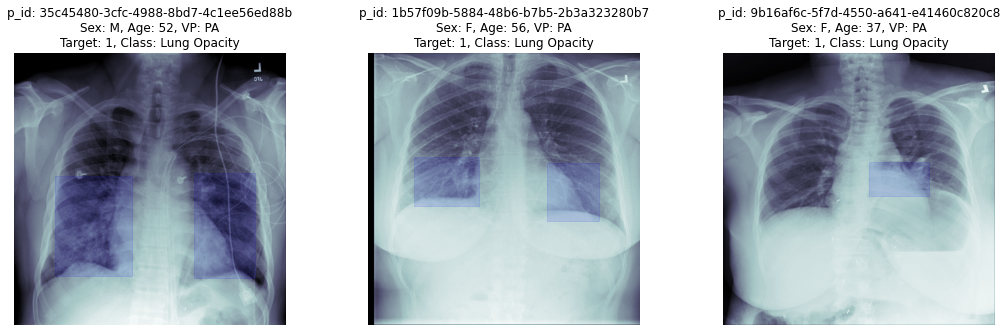

In [ ]:
# plotting for ViewPositon PA
plot_image(df_train['patientId'][(df_train.Target==1) & (df_train.ViewPosition == 'PA')].sample(3,random_state = 123),df_train.copy(),
           'stage_2_train_images/',display_opacity=True)

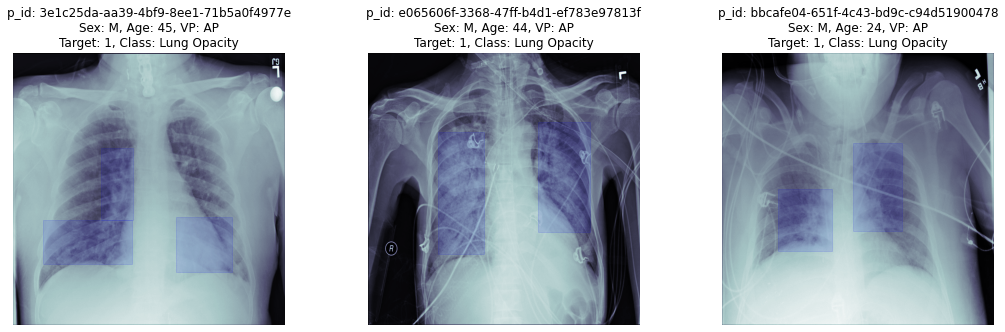

In [ ]:
# plotting for ViewPositon AP
plot_image(df_train['patientId'][(df_train.Target==1) & (df_train.ViewPosition == 'AP')].sample(3,random_state = 123),df_train.copy(),
           'stage_2_train_images/',display_opacity=True)

###**Conclusion**

After exploring both the tabular and DICOM data, we draw following conclusions.
1.	Discovered duplicate patientIds in the tabular data, an indication that the patient infected with Pneumonia at more places in the lungs.
2.	There are patients who are infected with Pneumonia at more than one place in the lungs
3.	Able to extract meta information from the DICOM data for more detailed analysis
4.	Further analyze the distribution of the data with the newly added features from DICOM metadata


### **Data Preprocessing**

In [ ]:
!pip3 install SimpleITK

     |████████████████████████████████| 48.4 MB 23 kB/s 


In [ ]:
import cv2
import math
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
import SimpleITK as sitk
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_data/stage_2_train_labels.csv')
print('train_df shape - ',train_df.shape)

train_df shape -  (30227, 6)


In [ ]:
train_df.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [ ]:
train_df.Target.value_counts()

0    20672
1     9555
Name: Target, dtype: int64

due to lack of TPU and GPU (resource limitations/slow trainings) and to balance the data. we will take 2000 sample from positive and 2000 samples from negative classes.

In [ ]:
train_df = train_df.loc[train_df[train_df.Target==1].sample(2000,random_state = 123).index.union(train_df[train_df.Target==0].sample(2000,random_state = 123).index).sort_values(),]

In [ ]:
train_df.Target.value_counts()

1    2000
0    2000
Name: Target, dtype: int64

In [ ]:
# tfrecord generation
tfrecord_writer = tf.io.TFRecordWriter("/content/drive/MyDrive/Colab Notebooks/capstone_data/rsna.tfrecord")

for path, label, x, y, w, h in tqdm(zip(train_df['patientId'], train_df['Target'], train_df['x'], train_df['y'], train_df['width'], train_df['height'])):
  path = path + '.dcm'
  path = os.path.join('/content/drive/MyDrive/Colab Notebooks/capstone_data/stage_2_train_images/', path)

  # sitk pre-processing 
  temp_image = sitk.ReadImage(path)
  # print('y')
  spacing = temp_image.GetSpacing()
  size_ = temp_image.GetSize()
  origin = temp_image.GetOrigin()
  factor = np.asarray(spacing) / np.ones(np.asarray(spacing).shape[0])
  factorSize = np.asarray(size_ * factor, dtype=float)
  newSize = factorSize
  newSize = newSize.astype(dtype=int)
  newSize_tuple = tuple(newSize.tolist())
  resampler = sitk.ResampleImageFilter()
  resampler.SetReferenceImage(temp_image)
  resampler.SetOutputSpacing(np.ones(np.asarray(spacing).shape[0]))
  resampler.SetSize(newSize_tuple)
  resampler.SetInterpolator(sitk.sitkNearestNeighbor)
  temp_image = resampler.Execute(temp_image)
  temp_image = sitk.GetArrayFromImage(temp_image)
  if len(temp_image.shape)==3:
    temp_image = temp_image[0]
  raw_image = (temp_image - temp_image.min())/(temp_image.max()-temp_image.min())
  raw_image = raw_image * 255.

  raw_image_shape = raw_image.shape[0]

  raw_image = raw_image.astype(np.uint8)
  raw_image = cv2.resize(raw_image, (256, 256))

  # bounding box processing
  scale = 256. / raw_image_shape
  if math.isnan(x):
    x = 0
    y = 0
    w = 1
    h = 1
  else:
    x = x*scale
    y = y*scale
    w = w*scale
    h = h*scale

  example = tf.train.Example(features=tf.train.Features(feature={
        'image': tf.train.Feature(bytes_list=tf.train.BytesList(value=[raw_image.tobytes()])),
        'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[int(label)])),
        'x': tf.train.Feature(int64_list=tf.train.Int64List(value=[int(x)])),
        'y': tf.train.Feature(int64_list=tf.train.Int64List(value=[int(y)])),
        'w': tf.train.Feature(int64_list=tf.train.Int64List(value=[int(w)])),
        'h': tf.train.Feature(int64_list=tf.train.Int64List(value=[int(h)])),
    }))
  tfrecord_writer.write(example.SerializeToString())

tfrecord_writer.close()

4000it [12:05,  5.51it/s]


In [ ]:
# helper functions to read and decode the tfrecord data
def decode_fn(record_bytes):
    return tf.io.parse_single_example(record_bytes,
      {"image": tf.io.FixedLenFeature([], dtype=tf.string, default_value=''),
       "label": tf.io.FixedLenFeature([], dtype=tf.int64, default_value=0),
        'x': tf.io.FixedLenFeature([], dtype=tf.int64, default_value=0),
        'y': tf.io.FixedLenFeature([], dtype=tf.int64, default_value=0),
        'w': tf.io.FixedLenFeature([], dtype=tf.int64, default_value=0),
        'h': tf.io.FixedLenFeature([], dtype=tf.int64, default_value=0),
      })

def process_dataset(raw_dataset):
    image = tf.io.decode_raw(raw_dataset['image'], out_type=tf.uint8)
    image = tf.reshape(image, [256, 256])
    image = tf.cast(image, dtype=tf.float32)
    image = tf.expand_dims(image, axis=-1)
    image = tf.image.grayscale_to_rgb(image)
    image = image / 255.
    #
    label = raw_dataset['label']
    label = tf.one_hot(label, depth=2)
    label = tf.cast(label, dtype=tf.float64)

    bbox = [tf.cast(raw_dataset['x'], dtype=tf.float32)/256., tf.cast(raw_dataset['y'], dtype=tf.float32)/256., tf.cast(raw_dataset['w'], dtype=tf.float32)/256., tf.cast(raw_dataset['h'], dtype=tf.float32)/256.]
    bbox = tf.convert_to_tensor(bbox, dtype=tf.float32)

    return image, {'logits': label, 'bbox': bbox}

def rsna_pneumonia_challenge_data():
    tfredord_list = ["/content/drive/MyDrive/Colab Notebooks/capstone_data/rsna.tfrecord"]
    full_ds = tf.data.TFRecordDataset(tfredord_list).map(decode_fn)
    full_ds = full_ds.shuffle(buffer_size=1000, seed=123)
    full_ds = full_ds.map(process_dataset, num_parallel_calls=tf.data.AUTOTUNE)
    full_size = sum(1 for _ in full_ds)
    train_size = int(0.7 * full_size)
    val_size = int(0.1 * full_size)
    test_size = int(0.2 * full_size)
    print(full_size,train_size, val_size, test_size)
    train_dataset = full_ds.take(train_size)
    test_dataset = full_ds.skip(train_size)
    val_dataset = test_dataset.skip(test_size)
    test_dataset = test_dataset.take(test_size)
    train_dataset = train_dataset.shuffle(buffer_size=train_size, seed=123)
    val_dataset = val_dataset.shuffle(buffer_size=val_size, seed=123)
    test_dataset = test_dataset.shuffle(buffer_size=test_size, seed=123)
    train_dataset = train_dataset.batch(batch_size=16, drop_remainder=True, num_parallel_calls=tf.data.AUTOTUNE)
    val_dataset = val_dataset.batch(batch_size=16, drop_remainder=True, num_parallel_calls=tf.data.AUTOTUNE)
    test_dataset = test_dataset.batch(batch_size=16, drop_remainder=True, num_parallel_calls=tf.data.AUTOTUNE)
    return train_dataset, val_dataset, test_dataset

### **Modeling**

In [ ]:
train_dataset, val_dataset, test_dataset = rsna_pneumonia_challenge_data()

4000 2800 400 800


#### **CNN**

In [ ]:
#import libraries
from keras.layers import Convolution2D, MaxPooling2D,Flatten
from keras.layers import BatchNormalization, Dropout, MaxPooling2D, Dense, Activation
from keras.models import Sequential

def CNN_():
  # define layers
  # model architecture building
  inputs = tf.keras.Input(shape=(256, 256, 3))

  x = Convolution2D(filters = 32, kernel_size = 3, padding="same")(inputs)
  x = Activation("relu")(x)
  x = BatchNormalization(axis=-1)(x)
  x = MaxPooling2D(pool_size=(3, 3))(x)
  x = Dropout(0.25)(x)

  x = Convolution2D(filters = 64, kernel_size = 3, padding="same")(x)
  x = Activation("relu")(x)
  x = BatchNormalization(axis=-1)(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Dropout(0.25)(x)

  x = Convolution2D(filters = 128, kernel_size = 3, padding="same")(x)
  x = Activation("relu")(x)
  x = BatchNormalization(axis=-1)(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Dropout(0.25)(x)


  x = Flatten()(x) 

  # fully connected layer
  model = Dense(units = 1024,activation = 'relu')(x)

  outputs_logits = tf.keras.layers.Dense(2, activation='softmax', name='logits')(model)
  outputs_bbox = tf.keras.layers.Dense(4, activation='sigmoid', name='bbox')(model)

  model_CNN = tf.keras.Model(inputs=inputs, outputs=[outputs_logits, outputs_bbox])
  
  return model_CNN

In [ ]:
print(CNN_().summary())

Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_56 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_33 (Conv2D)             (None, 256, 256, 32  896         ['input_56[0][0]']               
                                )                                                                 
                                                                                                  
 activation_9 (Activation)      (None, 256, 256, 32  0           ['conv2d_33[0][0]']              
                                )                                                          

In [ ]:
def train(model_ = '',model_path = ''):
  
  es = EarlyStopping(monitor='val_logits_categorical_accuracy', mode='max', verbose=1, patience=10)
  mc = ModelCheckpoint(model_path, monitor='val_logits_categorical_accuracy', mode='max', verbose=1, save_best_only=True)

  
  model = model_
  model.compile(loss={'logits': tf.keras.losses.CategoricalCrossentropy(), 'bbox':tf.keras.losses.MeanSquaredError()}, optimizer=tf.keras.optimizers.Adam(), metrics={'logits': [tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC(curve='ROC')], 'bbox': [tf.keras.metrics.MeanSquaredError()]})
  model.fit(train_dataset, shuffle=False, epochs=30, validation_data=val_dataset, verbose=1,callbacks=[es, mc])

  model.evaluate(test_dataset, verbose=1)

In [ ]:
train(CNN_(),'/content/drive/MyDrive/Colab Notebooks/capstone_data/CNN_best_model.h5')

Epoch 1/30
    175/Unknown - 16s 57ms/step - loss: 4.4756 - logits_loss: 4.4142 - bbox_loss: 0.0614 - logits_categorical_accuracy: 0.6611 - logits_auc_15: 0.6956 - bbox_mean_squared_error: 0.0614
Epoch 1: val_logits_categorical_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/Colab Notebooks/capstone_data/CNN_best_model.h5
175/175 [==============================] - 31s 141ms/step - loss: 4.4756 - logits_loss: 4.4142 - bbox_loss: 0.0614 - logits_categorical_accuracy: 0.6611 - logits_auc_15: 0.6956 - bbox_mean_squared_error: 0.0614 - val_loss: 36.7055 - val_logits_loss: 36.6410 - val_bbox_loss: 0.0645 - val_logits_categorical_accuracy: 0.5000 - val_logits_auc_15: 0.5000 - val_bbox_mean_squared_error: 0.0645
Epoch 2/30
175/175 [==============================] - ETA: 0s - loss: 0.6037 - logits_loss: 0.5620 - bbox_loss: 0.0417 - logits_categorical_accuracy: 0.7389 - logits_auc_15: 0.8039 - bbox_mean_squared_error: 0.0417
Epoch 2: val_logits_categorical_accuracy

In [ ]:
# load the best CNN model
from keras.models import load_model
CNN_best_model = load_model('/content/drive/MyDrive/Colab Notebooks/capstone_data/CNN_best_model.h5')
Train_cnn_perf = CNN_best_model.evaluate(train_dataset)
Test_cnn_perf = CNN_best_model.evaluate(test_dataset)

50/50 [==============================] - 10s 33ms/step - loss: 0.7005 - logits_loss: 0.6524 - bbox_loss: 0.0481 - logits_categorical_accuracy: 0.7525 - logits_auc_15: 0.8128 - bbox_mean_squared_error: 0.0481


In [ ]:
DL_perf_df = pd.DataFrame(columns = ['Model','Train_classification_accuracy','Test_classification_accuracy','Train_bbox_mean_squared_error','Test_bbox_mean_squared_error'])
i = 0
DL_perf_df.loc[i,:] = ['CNN',Train_cnn_perf[3],Test_cnn_perf[3],Train_cnn_perf[5],Test_cnn_perf[5]]
DL_perf_df

,Model,Train_classification_accuracy,Test_classification_accuracy,Train_bbox_mean_squared_error,Test_bbox_mean_squared_error
0,CNN,0.772857,0.7525,0.043554,0.048122


In [ ]:
test_d = [x for x in test_dataset.unbatch()]

In [ ]:
test_image = [a for a,b in test_d]
test_label = [b for a,b in test_d]
test_label_true = [np.argmax(x['logits'].numpy()) for x in test_label]
test_bbox_true = [x['bbox'].numpy() for x in test_label]

Confusion Metrics for CNN Model


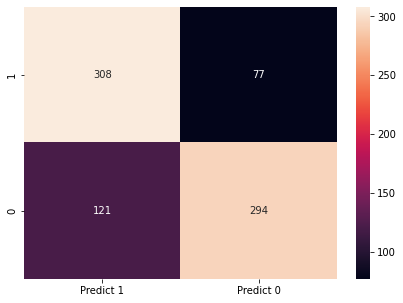

In [ ]:
test_pred_cnn = [CNN_best_model.predict(np.expand_dims(x, axis=0)) for x in test_image]
test_label_pred_cnn = [np.argmax(x[0]) for x in test_pred_cnn]
test_bbox_pred_cnn = [x[1] for x in test_pred_cnn]

print('Confusion Metrics for CNN Model')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_label_true, test_label_pred_cnn, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g');

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report for CNN")
print(classification_report(test_label_true, test_label_pred_cnn,labels=[1, 0]))

Classification Report for CNN
              precision    recall  f1-score   support

           1       0.72      0.80      0.76       385
           0       0.79      0.71      0.75       415

    accuracy                           0.75       800
   macro avg       0.76      0.75      0.75       800
weighted avg       0.76      0.75      0.75       800



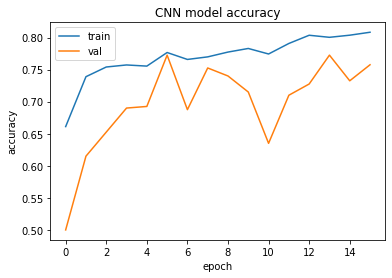

In [ ]:
cnn_history = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_data/cnn_history.csv')
#accuracy plots with epochs
plt.plot(cnn_history[' logits_categorical_accuracy'])
plt.plot(cnn_history['val_logits_categorical_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### **VGG16**

In [ ]:
def vgg16_(trainable=True):
  inputs = tf.keras.Input(shape=(256, 256, 3))
  model = tf.keras.applications.VGG16(include_top=False, input_shape=(256, 256, 3), input_tensor=inputs)
  for layer in model.layers:
        layer.trainable = trainable
  feature = model(inputs)
  feature = tf.keras.layers.Flatten()(feature)
  feature = tf.keras.layers.Dense(1024, activation='relu')(feature)
  outputs_logits = tf.keras.layers.Dense(2, activation='softmax', name='logits')(feature)
  outputs_bbox = tf.keras.layers.Dense(4, activation='sigmoid', name='bbox')(feature)

  model_resnet = tf.keras.Model(inputs=inputs, outputs=[outputs_logits, outputs_bbox])

  return model_resnet

In [ ]:
print(vgg16_(trainable=True).summary())

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 8, 8, 512)    14714688    ['input_1[0][0]']                
                                                                                                  
 flatten (Flatten)              (None, 32768)        0           ['vgg16[0][0]']                  
                                                                                                  
 dense (Dense)               

In [ ]:
def train(model_ = '',model_path = ''):
  
  es = EarlyStopping(monitor='val_logits_categorical_accuracy', mode='max', verbose=1, patience=10)
  mc = ModelCheckpoint(model_path, monitor='val_logits_categorical_accuracy', mode='max', verbose=1, save_best_only=True)

  model = model_
  model.compile(loss={'logits': tf.keras.losses.CategoricalCrossentropy(), 'bbox':tf.keras.losses.MeanSquaredError()}, optimizer=tf.keras.optimizers.Adam(), metrics={'logits': [tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC(curve='ROC')], 'bbox': [tf.keras.metrics.MeanSquaredError()]})
  model.fit(train_dataset, shuffle=True, epochs=30, validation_data=val_dataset, verbose=1,callbacks=[es, mc])

  model.evaluate(test_dataset, verbose=1)

In [ ]:
train(vgg16_(trainable=True),'/content/drive/MyDrive/Colab Notebooks/capstone_data/vgg16_best_model_new.h5')

Epoch 1/30
    175/Unknown - 102s 556ms/step - loss: 1.0293 - logits_loss: 0.9846 - bbox_loss: 0.0447 - logits_categorical_accuracy: 0.5011 - logits_auc_2: 0.5007 - bbox_mean_squared_error: 0.0447
Epoch 1: val_logits_categorical_accuracy improved from -inf to 0.48250, saving model to /content/drive/MyDrive/Colab Notebooks/capstone_data/vgg16_best_model_new.h5
175/175 [==============================] - 115s 629ms/step - loss: 1.0293 - logits_loss: 0.9846 - bbox_loss: 0.0447 - logits_categorical_accuracy: 0.5011 - logits_auc_2: 0.5007 - bbox_mean_squared_error: 0.0447 - val_loss: 0.7347 - val_logits_loss: 0.6963 - val_bbox_loss: 0.0384 - val_logits_categorical_accuracy: 0.4825 - val_logits_auc_2: 0.4921 - val_bbox_mean_squared_error: 0.0384
Epoch 2/30
175/175 [==============================] - ETA: 0s - loss: 0.7552 - logits_loss: 0.7103 - bbox_loss: 0.0448 - logits_categorical_accuracy: 0.4921 - logits_auc_2: 0.4942 - bbox_mean_squared_error: 0.0448
Epoch 2: val_logits_categorical_accur

In [ ]:
# load the best VGG16 model
from keras.models import load_model
vgg16_best_model = load_model('/content/drive/MyDrive/Colab Notebooks/capstone_data/vgg16_best_model_new.h5')
Train_vgg16_perf = vgg16_best_model.evaluate(train_dataset)
Test_vgg16_perf = vgg16_best_model.evaluate(test_dataset)

50/50 [==============================] - 13s 196ms/step - loss: 0.7301 - logits_loss: 0.6954 - bbox_loss: 0.0347 - logits_categorical_accuracy: 0.4850 - logits_auc_2: 0.4850 - bbox_mean_squared_error: 0.0347


In [ ]:
i = DL_perf_df.shape[0]
DL_perf_df.loc[i,:] = ['VGG16',Train_vgg16_perf[3],Test_vgg16_perf[3],Train_vgg16_perf[5],Test_vgg16_perf[5]]
DL_perf_df

,Model,Train_classification_accuracy,Test_classification_accuracy,Train_bbox_mean_squared_error,Test_bbox_mean_squared_error
0,CNN,0.772857,0.7525,0.043554,0.048122
1,VGG16,0.5075,0.485,0.03715,0.034738


VGG16 model is performing worse than CNN model

Confusion Metrics for VGG16 Model


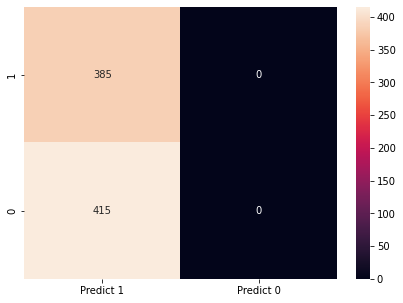

In [ ]:
test_pred_vgg16 = [vgg16_best_model.predict(np.expand_dims(x, axis=0)) for x in test_image]
test_label_pred_vgg16 = [np.argmax(x[0]) for x in test_pred_vgg16]
test_bbox_pred_vgg16 = [x[1] for x in test_pred_vgg16]

print('Confusion Metrics for VGG16 Model')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_label_true, test_label_pred_vgg16, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g');

In [ ]:
print("Classification Report for VGG16")
print(classification_report(test_label_true, test_label_pred_vgg16,labels=[1, 0]))

Classification Report for VGG16
              precision    recall  f1-score   support

           1       0.48      1.00      0.65       385
           0       0.00      0.00      0.00       415

    accuracy                           0.48       800
   macro avg       0.24      0.50      0.32       800
weighted avg       0.23      0.48      0.31       800



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


VGG16 model has 0 precision and recall for class 0 at 0.5 cutoff, it is performing worse than CNN.

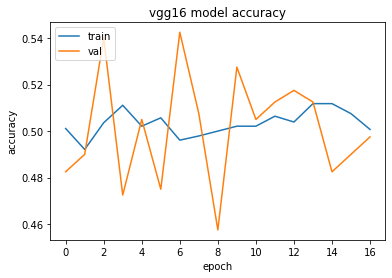

In [ ]:
cnn_history = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_data/vgg16_history.csv')
#accuracy plots with epochs
plt.plot(cnn_history['logits_categorical_accuracy'])
plt.plot(cnn_history['val_logits_categorical_accuracy'])
plt.title('vgg16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### **Resnet50**

In [ ]:
def resnet_50(trainable=True):
  inputs = tf.keras.Input(shape=(256, 256, 3))
  model = tf.keras.applications.ResNet50(include_top=False, input_shape=(256, 256, 3))
  for layer in model.layers:
        layer.trainable = trainable
  feature = model(inputs)
  feature = tf.keras.layers.Flatten()(feature)
  feature = tf.keras.layers.Dense(1024, activation='relu')(feature)
  outputs_logits = tf.keras.layers.Dense(2, activation='softmax', name='logits')(feature)
  outputs_bbox = tf.keras.layers.Dense(4, activation='sigmoid', name='bbox')(feature)

  model_resnet = tf.keras.Model(inputs=inputs, outputs=[outputs_logits, outputs_bbox])

  return model_resnet

In [ ]:
print(resnet_50(trainable=True).summary())

Model: "model_28"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_60 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 resnet50 (Functional)          (None, 8, 8, 2048)   23587712    ['input_60[0][0]']               
                                                                                                  
 flatten_34 (Flatten)           (None, 131072)       0           ['resnet50[0][0]']               
                                                                                                  
 dense_34 (Dense)               (None, 1024)         134218752   ['flatten_34[0][0]']      

In [ ]:
def train(model_ = '',model_path = ''):
  
  es = EarlyStopping(monitor='val_logits_categorical_accuracy', mode='max', verbose=1, patience=10)
  mc = ModelCheckpoint(model_path, monitor='val_logits_categorical_accuracy', mode='max', verbose=1, save_best_only=True)

  model = model_
  model.compile(loss={'logits': tf.keras.losses.CategoricalCrossentropy(), 'bbox':tf.keras.losses.MeanSquaredError()}, optimizer=tf.keras.optimizers.Adam(), metrics={'logits': [tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC(curve='ROC')], 'bbox': [tf.keras.metrics.MeanSquaredError()]})
  model.fit(train_dataset, shuffle=True, epochs=30, validation_data=val_dataset, verbose=1,callbacks=[es, mc])

  model.evaluate(test_dataset, verbose=1)

In [ ]:
train(resnet_50(trainable=True),'/content/drive/MyDrive/Colab Notebooks/capstone_data/resnet50_best_model.h5')

Epoch 1/30
    175/Unknown - 50s 242ms/step - loss: 3.3947 - logits_loss: 3.3498 - bbox_loss: 0.0449 - logits_categorical_accuracy: 0.6811 - logits_auc_11: 0.7227 - bbox_mean_squared_error: 0.0449
Epoch 1: val_logits_categorical_accuracy improved from -inf to 0.45000, saving model to /content/drive/MyDrive/Colab Notebooks/capstone_data/resnet50_best_model.h5
175/175 [==============================] - 71s 359ms/step - loss: 3.3947 - logits_loss: 3.3498 - bbox_loss: 0.0449 - logits_categorical_accuracy: 0.6811 - logits_auc_11: 0.7227 - bbox_mean_squared_error: 0.0449 - val_loss: 0.8489 - val_logits_loss: 0.7402 - val_bbox_loss: 0.1087 - val_logits_categorical_accuracy: 0.4500 - val_logits_auc_11: 0.4761 - val_bbox_mean_squared_error: 0.1087
Epoch 2/30
175/175 [==============================] - ETA: 0s - loss: 0.5427 - logits_loss: 0.5117 - bbox_loss: 0.0310 - logits_categorical_accuracy: 0.7650 - logits_auc_11: 0.8363 - bbox_mean_squared_error: 0.0310
Epoch 2: val_logits_categorical_accu

In [ ]:
# load the best resnet50 model
from keras.models import load_model
resnet50_best_model = load_model('/content/drive/MyDrive/Colab Notebooks/capstone_data/resnet50_best_model.h5')
Train_rn50_perf = resnet50_best_model.evaluate(train_dataset)
Test_rn50_perf = resnet50_best_model.evaluate(test_dataset)

50/50 [==============================] - 11s 157ms/step - loss: 0.3552 - logits_loss: 0.3338 - bbox_loss: 0.0214 - logits_categorical_accuracy: 0.8537 - logits_auc_11: 0.9362 - bbox_mean_squared_error: 0.0214


In [ ]:
i = DL_perf_df.shape[0]
DL_perf_df.loc[i,:] = ['Resnet_50',Train_rn50_perf[3],Test_rn50_perf[3],Train_rn50_perf[5],Test_rn50_perf[5]]
DL_perf_df

,Model,Train_classification_accuracy,Test_classification_accuracy,Train_bbox_mean_squared_error,Test_bbox_mean_squared_error
0,CNN,0.772857,0.7525,0.043554,0.048122
1,VGG16,0.5075,0.485,0.03715,0.034738
2,Resnet_50,0.921429,0.85375,0.02041,0.021401


Resnet50 Model is performing best out of all the three models. This is our final model.

Confusion Metrics for RESNET50 Model


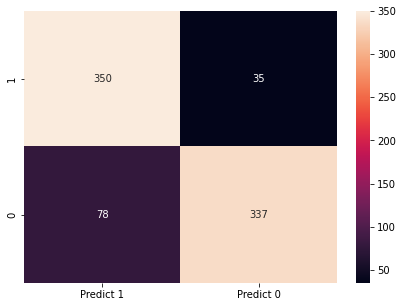

In [ ]:
test_pred_resnet50 = [resnet50_best_model.predict(np.expand_dims(x, axis=0)) for x in test_image]
test_label_pred_resnet50= [np.argmax(x[0]) for x in test_pred_resnet50]
test_bbox_pred_resnet50 = [x[1] for x in test_pred_resnet50]

print('Confusion Metrics for RESNET50 Model')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_label_true, test_label_pred_resnet50, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g');

In [ ]:
print("Classification Report for RESNET50")
print(classification_report(test_label_true, test_label_pred_resnet50,labels=[1, 0]))

Classification Report for RESNET50
              precision    recall  f1-score   support

           1       0.82      0.91      0.86       385
           0       0.91      0.81      0.86       415

    accuracy                           0.86       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800



ResNet50 model is performing best

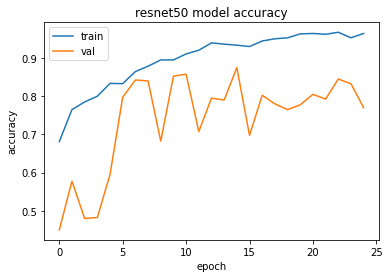

In [ ]:
cnn_history = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_data/resnet50_history.csv')
#accuracy plots with epochs
plt.plot(cnn_history['logits_categorical_accuracy'])
plt.plot(cnn_history['val_logits_categorical_accuracy'])
plt.title('resnet50 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_label_true[0:3]

[1, 1, 1]

In [ ]:
#plot patients with pneumonia with actutal and prediction of label and bboxes

import math
from matplotlib.patches import Rectangle
def plot_image_pred(test_image_list,actual_bbox_list,pred_bbox_list,actual_target_list, pred_target_list, display_opacity=True):
  row_len = math.ceil(len(test_image_list)/2) if len(test_image_list)/2 > 1 else 1
  fig, ax = plt.subplots(nrows=row_len, ncols=2,figsize=(10, row_len*5))
  for i in range(len(test_image_list)):
    image_data = test_image[i].numpy()
    if(row_len>1):
      ax[i//3,i%3].imshow(image_data,cmap = plt.cm.bone)
      ax[i//3,i%3].axis('off')
      ax[i//3,i%3].set_title('Actual Target: {}, Predicted Target: {}'.format(actual_target_list[i],pred_target_list[i]))
      if(display_opacity):
        # print('y',actual_bbox_list[i][0]*4*256, actual_bbox_list[i][1]*4*256, actual_bbox_list[i][2]*4, actual_bbox_list[i][3]*4)
        ax[i//3, i%3].add_patch(Rectangle(xy = (actual_bbox_list[i][0]*256, actual_bbox_list[i][1]*256),
                        width = actual_bbox_list[i][2]*256, height = actual_bbox_list[i][3]*256, 
                        color = 'blue', alpha = 0.2))
        ax[i//3, i%3].add_patch(Rectangle(xy = (pred_bbox_list[i][0][0]*256, pred_bbox_list[i][0][1]*256),
                        width = pred_bbox_list[i][0][2]*256, height = pred_bbox_list[i][0][3]*256, 
                        color = 'red', alpha = 0.2))
    else:
      ax[i].imshow(image_data,cmap = plt.cm.bone)
      ax[i].axis('off')
      ax[i].set_title('Actual Target: {}, Predicted Target: {}'.format(actual_target_list[i],pred_target_list[i]))
      if(display_opacity):
        # print(actual_bbox_list[i][0]*4*256, actual_bbox_list[i][1]*4*256, actual_bbox_list[i][2]*4, actual_bbox_list[i][3]*4)
        ax[i].add_patch(Rectangle(xy = (actual_bbox_list[i][0]*256, actual_bbox_list[i][1]*256),
                        width = actual_bbox_list[i][2]*256, height = actual_bbox_list[i][3]*256, 
                        color = 'blue', alpha = 0.2))
        ax[i].add_patch(Rectangle(xy = (pred_bbox_list[i][0][0]*256, pred_bbox_list[i][0][1]*256),
                        width = pred_bbox_list[i][0][2]*256, height = pred_bbox_list[i][0][3]*256, 
                        color = 'red', alpha = 0.2))

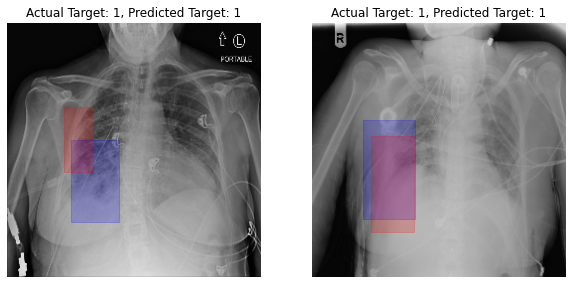

In [ ]:
# plotting for pneumonia patients
plot_image_pred(test_image[7:9],test_bbox_true[7:9],test_bbox_pred_resnet50[7:9],
                test_label_true[7:9],test_label_pred_resnet50[7:9], display_opacity=True)

#### **Model Summary**
* We have done the detailed EDA of the given dataset and find how the various attributes (obtained from both the files and images) are spread across the entire dataset
* We have created and applied three different models; CNN, VGG16 and Resnet50 to the dataset with earlystopping and modelcheckpoint to control the overfitting and save thebest models.
* •	We have realise that the best performing model is Resnet50 with test accuracy of 85% followed by CNN with test accuracy of 78%. VGG16 model is performing worst with test accuracy of 48%
* We have picked resnet50 as the final model of chioce.
* The model can be furthur explored and tuned to get the best performance out of it, it will require more computing power (GPU/TPU resources).